# RSA

***Key Generation In RSA :***

+ Choose 2 primes p,q using gmpy
+ n = p*q and $ \phi (n) = (p-1)*(q-1) $
+ Choose $ e $ in $ [2,\phi(n)-2] $ such that $ e $ and $ \phi(n) $ are coprimes i.e their gcd is 1
+ Choose $ d = e^{-1} mod(\phi(n)) $
+ Return ***Public keys :*** $ (n,e) $
+ Return ***Private key :*** $ (d) $

In [8]:
!pip install gmpy2


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [9]:
from qiskit_aer import AerSimulator
import gmpy2 # You need to install this package
from qiskit_ibm_runtime import Options, Session, SamplerV2 as Sampler
backend_sim = AerSimulator()
simulator = AerSimulator()

#Import an estimator, this time from qiskit (we import from Runtime for real hardware)
from qiskit.primitives import BackendSampler
sampler = BackendSampler(backend = backend_sim)
import numpy as np
from qiskit.visualization import plot_bloch_vector, plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt

from qiskit.circuit import QuantumRegister, ClassicalRegister, QuantumCircuit, Parameter
from qiskit import QuantumCircuit, transpile
from qiskit.result import marginal_counts
from qiskit.circuit.library import QFT
from numpy import pi
import math
import pandas as pd
from fractions import Fraction
from random import randint

/var/folders/jh/9wz4xz9j17x2c_b3x0zgtnv40000gn/T/ipykernel_4401/3302930460.py:9: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler = BackendSampler(backend = backend_sim)


# 1. Generate RSA Keys


In [10]:
import gmpy2
import numpy as np

def generate_keys():
    random1 = np.random.randint(3, 40)
    random2 = np.random.randint(3, 40)
    p = int(gmpy2.next_prime(random1))
    q = int(gmpy2.next_prime(random2))
    n = p * q
    phi = (p - 1) * (q - 1)
    e = 2
    while gmpy2.gcd(phi, e) != 1:
        e += 1
    d = gmpy2.invert(e, phi)
    return n, e, d, p, q

def secret_key_from_prime(prime1,prime2, e):
    phi = (prime1 - 1) * (prime2 - 1)
    d = gmpy2.invert(e, phi)
    return d


# 2. Encrypting plain_text blocks
***Encyption in RSA :***

***Input :*** $ Plain Text = [p_1,p_2,p_3,..........,p_k] $

***Output :*** $ Cipher Text = [c_1,c_2,c_3,..........,c_k] $

where

$ c_{i} = p_{i}^e mod (n) $


In [11]:
# in order for this to work aldso with small numbers, we will encode our ASCII values in 3 octal digits, and encode them one by one
def string_to_flattened_bitstring(text):
    flattened_bitstring = []
    
    for char in text:
        # Get the ASCII value of the character
        ascii_value = ord(char)
        
        # Convert ASCII to octal and ensure it's a 3-digit number (pad with zeros if necessary)
        octal_value = oct(ascii_value)[2:].zfill(3)  # remove '0o' prefix and pad to 3 digits
        
        # Add each digit of the octal representation to the flattened bitstring
        flattened_bitstring.extend([int(digit) for digit in octal_value])
    
    return flattened_bitstring


def encrypt(flattened_bitstring, public_keys):
    n, e = public_keys
    cipher_bitstring = []
    for bit in flattened_bitstring:
        cipher_bit = gmpy2.powmod(bit, e, n)
        cipher_bitstring.append(cipher_bit)
    return cipher_bitstring



# 3. Decrypting cipher_text


***Decryption in RSA :***

***Input :*** $ Cipher Text = [c_1,c_2,c_3,..........,c_k] $

***Output :*** $ Plain Text = [p_1,p_2,p_3,..........,p_k] $

$ p_{i} = c_{i}^d mod (n) $

In [12]:

def decrypt(cipher_bitstring, secret_key, p, q):
    n = p * q
    d = secret_key
    decrypted_bitstring = []
    for cipher_bit in cipher_bitstring:
        plain_bit = gmpy2.powmod(cipher_bit, d, n)
        decrypted_bitstring.append(plain_bit)
    return decrypted_bitstring


# Reformatting the Decrypted Bitstring
def reformat_decrypted_bitstring(decrypted_bitstring):
    # Reformat the decrypted bitstring back to 3-digit octal chunks
    char_octal = [decrypted_bitstring[i:i+3] for i in range(0, len(decrypted_bitstring), 3)]
    
    # Convert each 3-digit octal chunk back to ASCII character
    text = ''
    for octal in char_octal:
        # Convert the 3-digit octal block to its decimal (ASCII) equivalent
        octal_value = ''.join(map(str, octal))
        ascii_value = int(octal_value, 8)  # Convert from octal to decimal (ASCII)
        text += chr(ascii_value)
    
    return text


In [13]:

# Example Usage
# Generate RSA keys
n, e, d, p, q = generate_keys()
public_keys = (n, e)
secret_key = d

print("Public Keys (n, e):", public_keys)
print("Secret Key (d):", secret_key)

# Input text
text = "Sensitive information"

# Step 2: Encode the text to flattened bitstring
flattened_bitstring = string_to_flattened_bitstring(text)
print("Flattened Bitstring:", flattened_bitstring)

# Step 3: Encrypt the flattened bitstring
encrypted_bitstring = encrypt(flattened_bitstring, public_keys)
print("Encrypted Bitstring:", encrypted_bitstring)


# Step 4: Decrypt the encrypted bitstring and check it matches the original
decrypted_bitstring = decrypt(encrypted_bitstring, secret_key, p, q)
print("Decrypted Bitstring:", decrypted_bitstring)


# Step 5: Reconstruct the text from the decrypted bitstring
reconstructed_text = reformat_decrypted_bitstring(decrypted_bitstring)
print("Reconstructed Text:", reconstructed_text)



Public Keys (n, e): (323, 5)
Secret Key (d): 173
Flattened Bitstring: [1, 2, 3, 1, 4, 5, 1, 5, 6, 1, 6, 3, 1, 5, 1, 1, 6, 4, 1, 5, 1, 1, 6, 6, 1, 4, 5, 0, 4, 0, 1, 5, 1, 1, 5, 6, 1, 4, 6, 1, 5, 7, 1, 6, 2, 1, 5, 5, 1, 4, 1, 1, 6, 4, 1, 5, 1, 1, 5, 7, 1, 5, 6]
Encrypted Bitstring: [mpz(1), mpz(32), mpz(243), mpz(1), mpz(55), mpz(218), mpz(1), mpz(218), mpz(24), mpz(1), mpz(24), mpz(243), mpz(1), mpz(218), mpz(1), mpz(1), mpz(24), mpz(55), mpz(1), mpz(218), mpz(1), mpz(1), mpz(24), mpz(24), mpz(1), mpz(55), mpz(218), mpz(0), mpz(55), mpz(0), mpz(1), mpz(218), mpz(1), mpz(1), mpz(218), mpz(24), mpz(1), mpz(55), mpz(24), mpz(1), mpz(218), mpz(11), mpz(1), mpz(24), mpz(32), mpz(1), mpz(218), mpz(218), mpz(1), mpz(55), mpz(1), mpz(1), mpz(24), mpz(55), mpz(1), mpz(218), mpz(1), mpz(1), mpz(218), mpz(11), mpz(1), mpz(218), mpz(24)]
Decrypted Bitstring: [mpz(1), mpz(2), mpz(3), mpz(1), mpz(4), mpz(5), mpz(1), mpz(5), mpz(6), mpz(1), mpz(6), mpz(3), mpz(1), mpz(5), mpz(1), mpz(1), mpz(6), mpz(4

# Shor's Algorithm

Shor’s algorithm is famous for factoring integers in polynomial time. Since the best-known classical algorithm requires superpolynomial time to factor the product of two primes, the widely used cryptosystem, RSA, relies on factoring being impossible for large enough integers.

In this chapter we will focus on the quantum part of Shor’s algorithm, which actually solves the problem of _period finding_. Since a factoring problem can be turned into a period finding problem in polynomial time, an efficient period finding algorithm can be used to factor integers efficiently too. For now its enough to show that if we can compute the period of $a^x\bmod N$ efficiently, then we can also efficiently factor. Since period finding is a worthy problem in its own right, we will first solve this, then discuss how this can be used to factor in section 5.

In [14]:
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import Options, Session, SamplerV2 as Sampler
backend_sim = AerSimulator()
simulator = AerSimulator()

#Import an estimator, this time from qiskit (we import from Runtime for real hardware)
from qiskit.primitives import BackendSampler
sampler = BackendSampler(backend = backend_sim)
import numpy as np
from qiskit.visualization import plot_bloch_vector, plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt

from qiskit.circuit import QuantumRegister, ClassicalRegister, QuantumCircuit, Parameter
from qiskit import QuantumCircuit, transpile
from qiskit.result import marginal_counts
from qiskit.circuit.library import QFT
from numpy import pi
import math
import pandas as pd
from fractions import Fraction
from random import randint

/var/folders/jh/9wz4xz9j17x2c_b3x0zgtnv40000gn/T/ipykernel_4401/268835736.py:8: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler = BackendSampler(backend = backend_sim)


## 1. The Problem: Period Finding

Let’s look at the periodic function:

$$ f(x) = a^x \bmod{N}$$

<details>
    <summary>Reminder: Modulo &amp; Modular Arithmetic (Click here to expand)</summary>

The modulo operation (abbreviated to 'mod') simply means to find the remainder when dividing one number by another. For example:

$$ 17 \bmod 5 = 2 $$

Since $17 \div 5 = 3$ with remainder $2$. (i.e. $17 = (3\times 5) + 2$). In Python, the modulo operation is denoted through the <code>%</code> symbol.

This behaviour is used in <a href="https://en.wikipedia.org/wiki/Modular_arithmetic">modular arithmetic</a>, where numbers 'wrap round' after reaching a certain value (the modulus). Using modular arithmetic, we could write:

$$ 17 = 2 \pmod 5$$

Note that here the $\pmod 5$ applies to the entire equation (since it is in parenthesis), unlike the equation above where it only applied to the left-hand side of the equation.
</details>

where $a$ and $N$ are positive integers, $a$ is less than $N$, and they have no common factors. The period, or order ($r$), is the smallest (non-zero) integer such that:

$$a^r \bmod N = 1 $$ 

We can see an example of this function plotted on the graph below. Note that the lines between points are to help see the periodicity and do not represent the intermediate values between the x-markers.

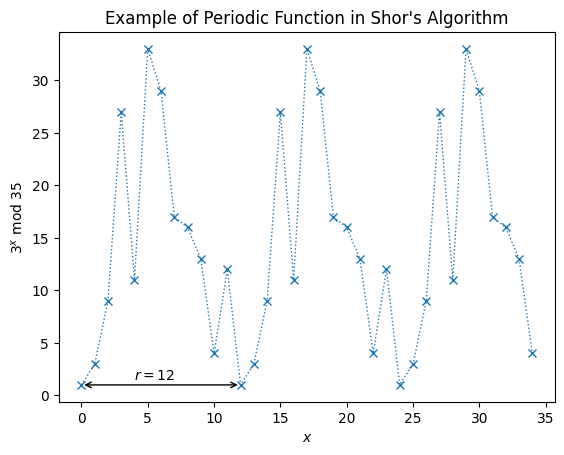

In [15]:
N = 35
a = 3

# Calculate the plotting data
xvals = np.arange(35)
yvals = [np.mod(a**x, N) for x in xvals]

# Use matplotlib to display it nicely
fig, ax = plt.subplots()
ax.plot(xvals, yvals, linewidth=1, linestyle='dotted', marker='x')
ax.set(xlabel='$x$', ylabel='$%i^x$ mod $%i$' % (a, N),
       title="Example of Periodic Function in Shor's Algorithm")
try: # plot r on the graph
    r = yvals[1:].index(1) +1 
    plt.annotate('', xy=(0,1), xytext=(r,1), arrowprops=dict(arrowstyle='<->'))
    plt.annotate('$r=%i$' % r, xy=(r/3,1.5))
except ValueError:
    print('Could not find period, check a < N and have no common factors.')

## 2. The Solution

Shor’s solution was to use quantum phase estimation on the unitary operator:

$$ U|y\rangle \equiv |ay \bmod N \rangle $$

To see how this is helpful, let’s work out what an eigenstate of U might look like. If we started in the state $|1\rangle$, we can see that each successive application of U will multiply the state of our register by $a \pmod N$, and after $r$ applications we will arrive at the state $|1\rangle$ again. For example with $a = 3$ and $N = 35$:

$$\begin{aligned}
U|1\rangle &= |3\rangle & \\
U^2|1\rangle &= |9\rangle \\
U^3|1\rangle &= |27\rangle \\
& \vdots \\
U^{(r-1)}|1\rangle &= |12\rangle \\
U^r|1\rangle &= |1\rangle 
\end{aligned}$$

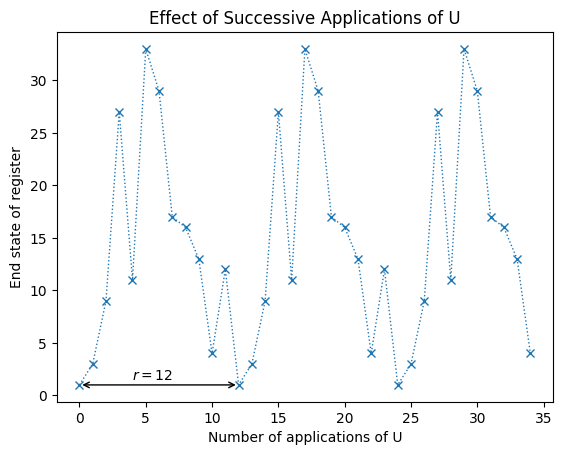

In [16]:
ax.set(xlabel='Number of applications of U', ylabel='End state of register',
       title="Effect of Successive Applications of U")
fig

So a superposition of the states in this cycle ($|u_0\rangle$) would be an eigenstate of $U$:

$$|u_0\rangle = \tfrac{1}{\sqrt{r}}\sum_{k=0}^{r-1}{|a^k \bmod N\rangle} $$


<details>
    <summary>Click to Expand: Example with $a = 3$ and $N=35$</summary>

$$\begin{aligned}
|u_0\rangle &= \tfrac{1}{\sqrt{12}}(|1\rangle + |3\rangle + |9\rangle \dots + |4\rangle + |12\rangle) \\[10pt]
U|u_0\rangle &= \tfrac{1}{\sqrt{12}}(U|1\rangle + U|3\rangle + U|9\rangle \dots + U|4\rangle + U|12\rangle) \\[10pt]
 &= \tfrac{1}{\sqrt{12}}(|3\rangle + |9\rangle + |27\rangle \dots + |12\rangle + |1\rangle) \\[10pt]
 &= |u_0\rangle
\end{aligned}$$
</details>


This eigenstate has an eigenvalue of 1, which isn’t very interesting. A more interesting eigenstate could be one in which the phase is different for each of these computational basis states. Specifically, let’s look at the case in which the phase of the $k$th state is proportional to $k$:

$$\begin{aligned}
|u_1\rangle &= \tfrac{1}{\sqrt{r}}\sum_{k=0}^{r-1}{e^{-\tfrac{2\pi i k}{r}}|a^k \bmod N\rangle}\\[10pt]
U|u_1\rangle &= e^{\tfrac{2\pi i}{r}}|u_1\rangle 
\end{aligned}
$$

<details>
    <summary>Click to Expand: Example with $a = 3$ and $N=35$</summary>

$$\begin{aligned}
|u_1\rangle &= \tfrac{1}{\sqrt{12}}(|1\rangle + e^{-\tfrac{2\pi i}{12}}|3\rangle + e^{-\tfrac{4\pi i}{12}}|9\rangle \dots + e^{-\tfrac{20\pi i}{12}}|4\rangle + e^{-\tfrac{22\pi i}{12}}|12\rangle) \\[10pt]
U|u_1\rangle &= \tfrac{1}{\sqrt{12}}(|3\rangle + e^{-\tfrac{2\pi i}{12}}|9\rangle + e^{-\tfrac{4\pi i}{12}}|27\rangle \dots + e^{-\tfrac{20\pi i}{12}}|12\rangle + e^{-\tfrac{22\pi i}{12}}|1\rangle) \\[10pt]
U|u_1\rangle &= e^{\tfrac{2\pi i}{12}}\cdot\tfrac{1}{\sqrt{12}}(e^{\tfrac{-2\pi i}{12}}|3\rangle + e^{-\tfrac{4\pi i}{12}}|9\rangle + e^{-\tfrac{6\pi i}{12}}|27\rangle \dots + e^{-\tfrac{22\pi i}{12}}|12\rangle + e^{-\tfrac{24\pi i}{12}}|1\rangle) \\[10pt]
U|u_1\rangle &= e^{\tfrac{2\pi i}{12}}|u_1\rangle
\end{aligned}$$

(We can see $r = 12$ appears in the denominator of the phase.)
</details>

This is a particularly interesting eigenvalue as it contains $r$. In fact, $r$ has to be included to make sure the phase differences between the $r$ computational basis states are equal. This is not the only eigenstate with this behaviour; to generalise this further, we can multiply an integer, $s$, to this phase difference, which will show up in our eigenvalue:

$$\begin{aligned}
|u_s\rangle &= \tfrac{1}{\sqrt{r}}\sum_{k=0}^{r-1}{e^{-\tfrac{2\pi i s k}{r}}|a^k \bmod N\rangle}\\[10pt]
U|u_s\rangle &= e^{\tfrac{2\pi i s}{r}}|u_s\rangle 
\end{aligned}
$$

<details>
    <summary>Click to Expand: Example with $a = 3$ and $N=35$</summary>

$$\begin{aligned}
|u_s\rangle &= \tfrac{1}{\sqrt{12}}(|1\rangle + e^{-\tfrac{2\pi i s}{12}}|3\rangle + e^{-\tfrac{4\pi i s}{12}}|9\rangle \dots + e^{-\tfrac{20\pi i s}{12}}|4\rangle + e^{-\tfrac{22\pi i s}{12}}|12\rangle) \\[10pt]
U|u_s\rangle &= \tfrac{1}{\sqrt{12}}(|3\rangle + e^{-\tfrac{2\pi i s}{12}}|9\rangle + e^{-\tfrac{4\pi i s}{12}}|27\rangle \dots + e^{-\tfrac{20\pi i s}{12}}|12\rangle + e^{-\tfrac{22\pi i s}{12}}|1\rangle) \\[10pt]
U|u_s\rangle &= e^{\tfrac{2\pi i s}{12}}\cdot\tfrac{1}{\sqrt{12}}(e^{-\tfrac{2\pi i s}{12}}|3\rangle + e^{-\tfrac{4\pi i s}{12}}|9\rangle + e^{-\tfrac{6\pi i s}{12}}|27\rangle \dots + e^{-\tfrac{22\pi i s}{12}}|12\rangle + e^{-\tfrac{24\pi i s}{12}}|1\rangle) \\[10pt]
U|u_s\rangle &= e^{\tfrac{2\pi i s}{12}}|u_s\rangle
\end{aligned}$$

</details>

We now have a unique eigenstate for each integer value of $s$ where $$0 \leq s \leq r-1.$$ Very conveniently, if we sum up all these eigenstates, the different phases cancel out all computational basis states except $|1\rangle$:

$$ \tfrac{1}{\sqrt{r}}\sum_{s=0}^{r-1} |u_s\rangle = |1\rangle$$

<details>
    <summary>Click to Expand: Example with $a = 7$ and $N=15$</summary>

For this, we will look at a smaller example where $a = 7$ and $N=15$. In this case $r=4$:

$$\begin{aligned}
\tfrac{1}{2}(\quad|u_0\rangle &= \tfrac{1}{2}(|1\rangle \hphantom{e^{-\tfrac{2\pi i}{12}}}+ |7\rangle \hphantom{e^{-\tfrac{12\pi i}{12}}} + |4\rangle \hphantom{e^{-\tfrac{12\pi i}{12}}} + |13\rangle)\dots \\[10pt]
+ |u_1\rangle &= \tfrac{1}{2}(|1\rangle + e^{-\tfrac{2\pi i}{4}}|7\rangle + e^{-\tfrac{\hphantom{1}4\pi i}{4}}|4\rangle + e^{-\tfrac{\hphantom{1}6\pi i}{4}}|13\rangle)\dots \\[10pt]
+ |u_2\rangle &= \tfrac{1}{2}(|1\rangle + e^{-\tfrac{4\pi i}{4}}|7\rangle + e^{-\tfrac{\hphantom{1}8\pi i}{4}}|4\rangle + e^{-\tfrac{12\pi i}{4}}|13\rangle)\dots \\[10pt]
+ |u_3\rangle &= \tfrac{1}{2}(|1\rangle + e^{-\tfrac{6\pi i}{4}}|7\rangle + e^{-\tfrac{12\pi i}{4}}|4\rangle + e^{-\tfrac{18\pi i}{4}}|13\rangle)\quad) = |1\rangle \\[10pt]
\end{aligned}$$

</details>

Since the computational basis state $|1\rangle$ is a superposition of these eigenstates, which means if we do QPE on $U$ using the state $|1\rangle$, we will measure a phase:

$$\phi = \frac{s}{r}$$

Where $s$ is a random integer between $0$ and $r-1$. We finally use the [continued fractions](https://en.wikipedia.org/wiki/Continued_fraction) algorithm on $\phi$ to find $r$. The circuit diagram looks like this (note that this diagram uses Qiskit's qubit ordering convention):

<img src="images/shor_circuit_1.svg">

We will next demonstrate Shor’s algorithm using Qiskit’s simulators. For this demonstration we will provide the circuits for $U$ without explanation, but in section 4 we will discuss how circuits for $U^{2^j}$ can be constructed efficiently.

## 3. Qiskit Implementation

In this example we will solve the period finding problem for $a=7$ and $N=15$. We provide the circuits for $U$ where:

$$U|y\rangle = |ay\bmod 15\rangle $$

without explanation. To create $U^x$, we will simply repeat the circuit $x$ times. In the next section we will discuss a general method for creating these circuits efficiently. The function `c_amod15` returns the controlled-U gate for `a`, repeated `power` times.

In [17]:
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    U = QuantumCircuit(4)        
    for iteration in range(power):
        if a in [2,13]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [7,8]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, power)
    c_U = U.control()
    return c_U

We will use 8 counting qubits:

In [18]:
# Specify variables
n_count = 8  # number of counting qubits
a = 7

We also import the circuit for the QFT (you can read more about the QFT in the [quantum Fourier transform chapter](./quantum-fourier-transform.html#generalqft)):

In [19]:
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

With these building blocks we can easily construct the circuit for Shor's algorithm:

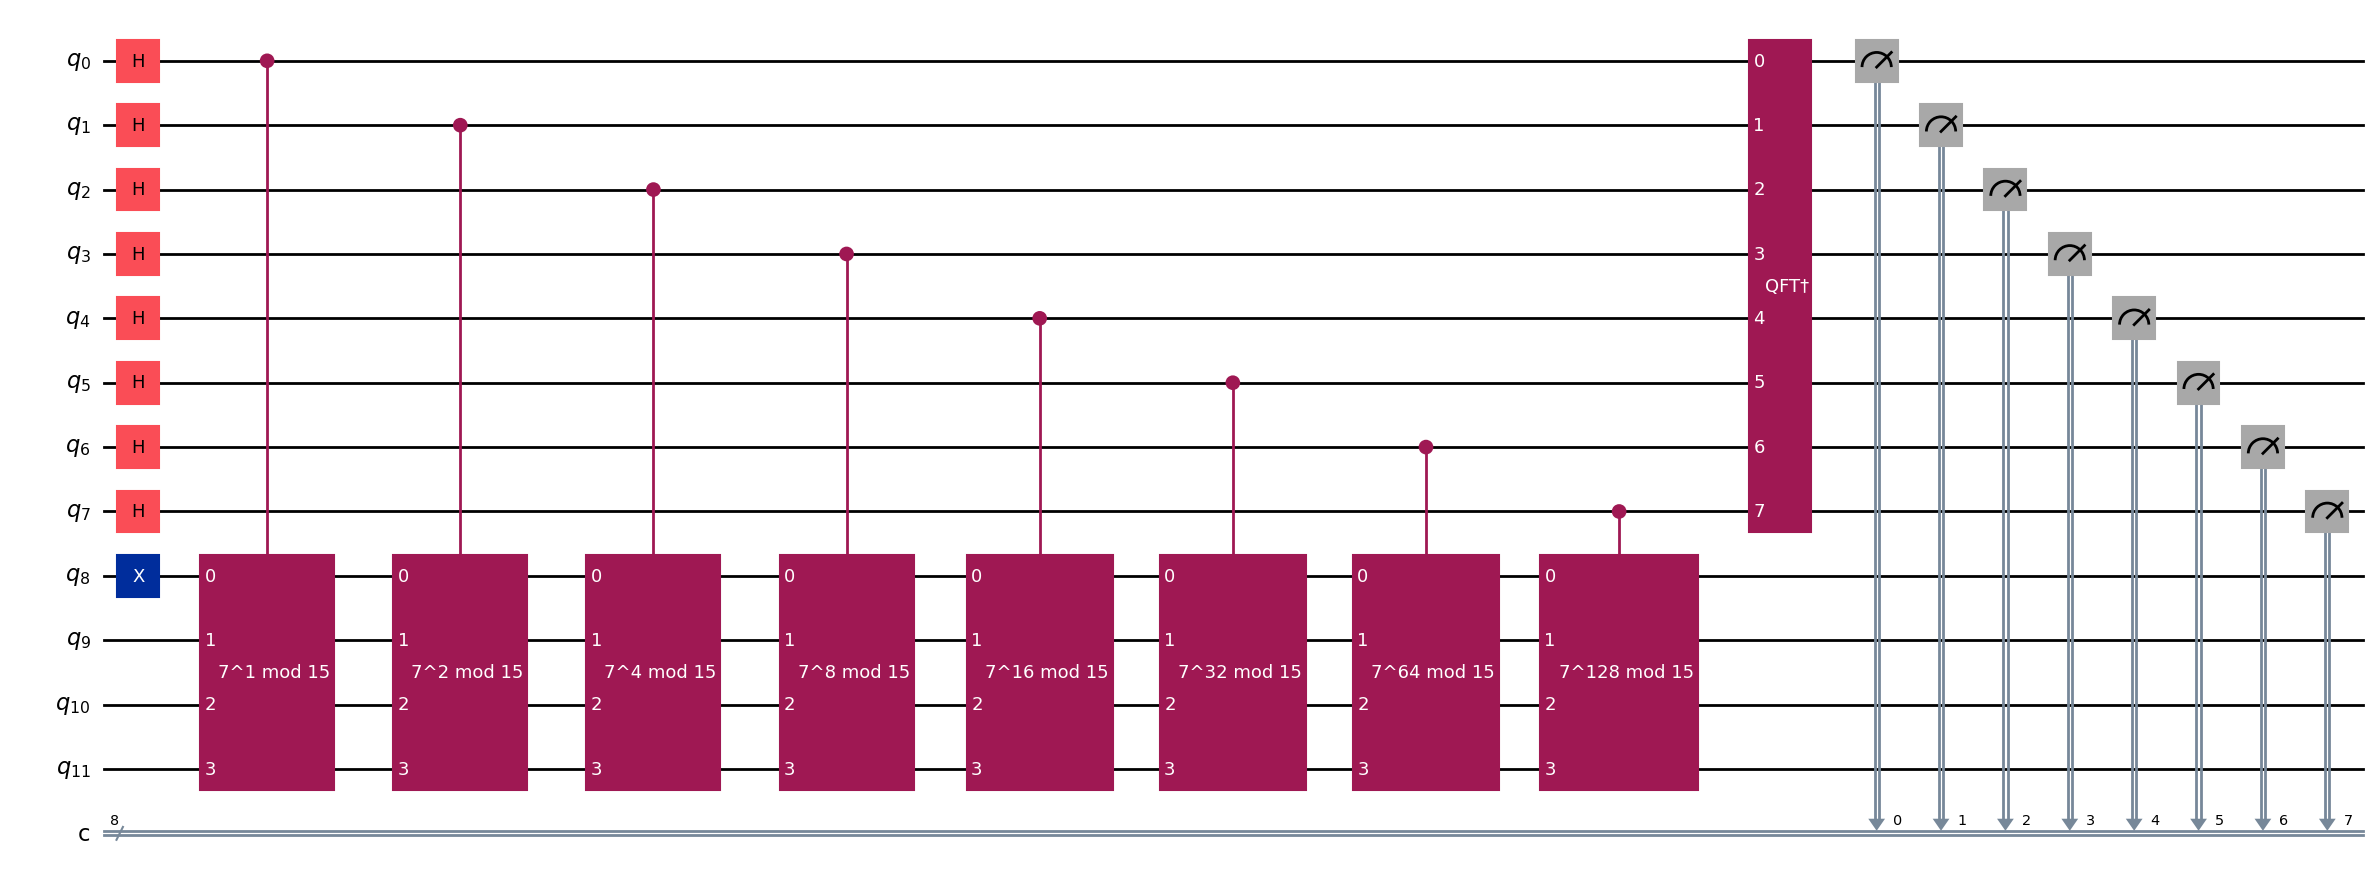

In [20]:
# Create QuantumCircuit with n_count counting qubits
# plus 4 qubits for U to act on
qc = QuantumCircuit(n_count + 4, n_count)

# Initialize counting qubits
# in state |+>
for q in range(n_count):
    qc.h(q)
    
# And auxiliary register in state |1>
qc.x(n_count)

# Do controlled-U operations
for q in range(n_count):
    qc.append(c_amod15(a, 2**q), 
             [q] + [i+n_count for i in range(4)])

# Do inverse-QFT
qc.append(qft_dagger(n_count), range(n_count))

# Measure circuit
qc.measure(range(n_count), range(n_count))
qc.draw('mpl', fold=-1)  # -1 means 'do not fold' 

Let's see what results we measure:

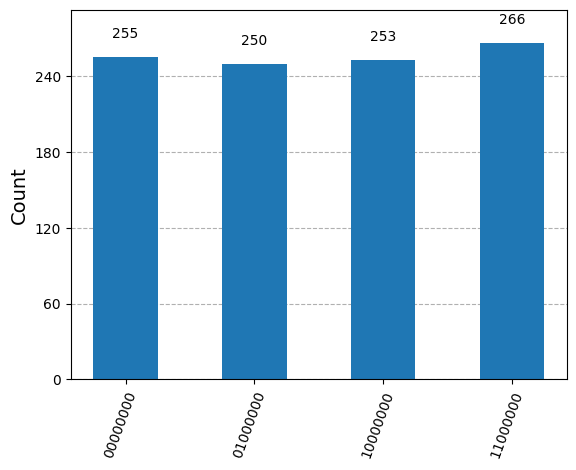

In [21]:
aer_sim = AerSimulator()
t_qc = transpile(qc, aer_sim)
results = aer_sim.run(t_qc).result()
counts = results.get_counts()
plot_histogram(counts)

--> 4 eigenvectors, 4 factors.

Since we have 8 qubits, these results correspond to measured phases of:

In [22]:
rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**n_count)  # Find corresponding eigenvalue
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    rows.append([f"{output}(bin) = {decimal:>3}(dec)", 
                 f"{decimal}/{2**n_count} = {phase:.2f}"])
# Print the rows in a table
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

            Register Output           Phase
0  11000000(bin) = 192(dec)  192/256 = 0.75
1  01000000(bin) =  64(dec)   64/256 = 0.25
2  10000000(bin) = 128(dec)  128/256 = 0.50
3  00000000(bin) =   0(dec)    0/256 = 0.00


We can now use the continued fractions algorithm to attempt to find $s$ and $r$. Python has this functionality built in: We can use the `fractions` module to turn a float into a `Fraction` object, for example:

In [25]:
Fraction(0.666)

#Fraction(0.666).limit_denominator(15)

# Exercise: Implement yourself the continuous fraction algorithm

Fraction(5998794703657501, 9007199254740992)

Because this gives fractions that return the result exactly (in this case, `0.6660000...`), this can give gnarly results like the one above. We can use the `.limit_denominator()` method to get the fraction that most closely resembles our float, with denominator below a certain value:

In [26]:
# Get fraction that most closely resembles 0.666
# with denominator < 15
Fraction(0.666).limit_denominator(15)

Fraction(2, 3)

Much nicer! The order (r) must be less than N, so we will set the maximum denominator to be `15`:

In [27]:
rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase, f"{frac.numerator}/{frac.denominator}", frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

   Phase Fraction  Guess for r
0   0.75      3/4            4
1   0.25      1/4            4
2   0.50      1/2            2
3   0.00      0/1            1


We can see that two of the measured eigenvalues provided us with the correct result: $r=4$, and we can see that Shor’s algorithm has a chance of failing. These bad results are because $s = 0$, or because $s$ and $r$ are not coprime and instead of $r$ we are given a factor of $r$. The easiest solution to this is to simply repeat the experiment until we get a satisfying result for $r$.

### Quick Exercise

- Modify the circuit above for values of $a = 2, 8, 11$ and $13$. What results do you get and why?

## 4. Modular Exponentiation

You may have noticed that the method of creating the $U^{2^j}$ gates by repeating $U$ grows exponentially with $j$ and will not result in a polynomial time algorithm. We want a way to create the operator:

$$ U^{2^j}|y\rangle = |a^{2^j}y \bmod N \rangle $$

that grows polynomially with $j$. Fortunately, calculating:

$$ a^{2^j} \bmod N$$

efficiently is possible. Classical computers can use an algorithm known as _repeated squaring_ to calculate an exponential. In our case, since we are only dealing with exponentials of the form $2^j$, the repeated squaring algorithm becomes very simple:

In [28]:
def a2jmodN(a, j, N):
    """Compute a^{2^j} (mod N) by repeated squaring"""
    for i in range(j):
        a = np.mod(a**2, N)
    return a

In [29]:
a2jmodN(7, 2049, 53)

np.int64(47)

If an efficient algorithm is possible in Python, then we can use the same algorithm on a quantum computer. Unfortunately, despite scaling polynomially with $j$, modular exponentiation circuits are not straightforward and are the bottleneck in Shor’s algorithm. A beginner-friendly implementation can be found in reference [1].

## 5. Factoring from Period Finding

Not all factoring problems are difficult; we can spot an even number instantly and know that one of its factors is 2. In fact, there are [specific criteria](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.186-4.pdf#%5B%7B%22num%22%3A127%2C%22gen%22%3A0%7D%2C%7B%22name%22%3A%22XYZ%22%7D%2C70%2C223%2C0%5D) for choosing numbers that are difficult to factor, but the basic idea is to choose the product of two large prime numbers.

A general factoring algorithm will first check to see if there is a shortcut to factoring the integer (is the number even? Is the number of the form $N = a^b$?), before using Shor’s period finding for the worst-case scenario. Since we aim to focus on the quantum part of the algorithm, we will jump straight to the case in which N is the product of two primes.

### Example: Factoring 15

To see an example of factoring on a small number of qubits, we will factor 15, which we all know is the product of the not-so-large prime numbers 3 and 5.

In [30]:
N = 15

The first step is to choose a random number, $a$, between $1$ and $N-1$:

In [31]:
np.random.seed(1) # This is to make sure we get reproduceable results
a = np.random.randint(2, 15)
print(a)

7


Next we quickly check it isn't already a non-trivial factor of $N$:

In [32]:
from math import gcd # greatest common divisor
gcd(a, N)

1

Great. Next, we do Shor's order finding algorithm for `a = 7` and `N = 15`. Remember that the phase we measure will be $s/r$ where:

$$ a^r \bmod N = 1 $$

and $s$ is a random integer between 0 and $r-1$.

In [39]:
def qpe_amod15(a):
    n_count = 8
    qc = QuantumCircuit(4+n_count, n_count)
    for q in range(n_count):
        qc.h(q)     # Initialize counting qubits in state |+>
    qc.x(3+n_count) # And auxiliary register in state |1>
    for q in range(n_count): # Do controlled-U operations
        qc.append(c_amod15(a, 2**q), 
                 [q] + [i+n_count for i in range(4)])
    qc.append(qft_dagger(n_count), range(n_count)) # Do inverse-QFT
    qc.measure(range(n_count), range(n_count))
    display(qc.draw('mpl'))
    # Simulate Results
    aer_sim = AerSimulator()
    # Setting memory=True below allows us to see a list of each sequential reading
    t_qc = transpile(qc, aer_sim)
    result = aer_sim.run(t_qc,shots=1, memory=True).result()
    readings = result.get_memory()
    print("Register Reading: " + readings[0])
    phase = int(readings[0],2)/(2**n_count)
    print("Corresponding Phase: %f" % phase)
    return phase

From this phase, we can easily find a guess for $r$:

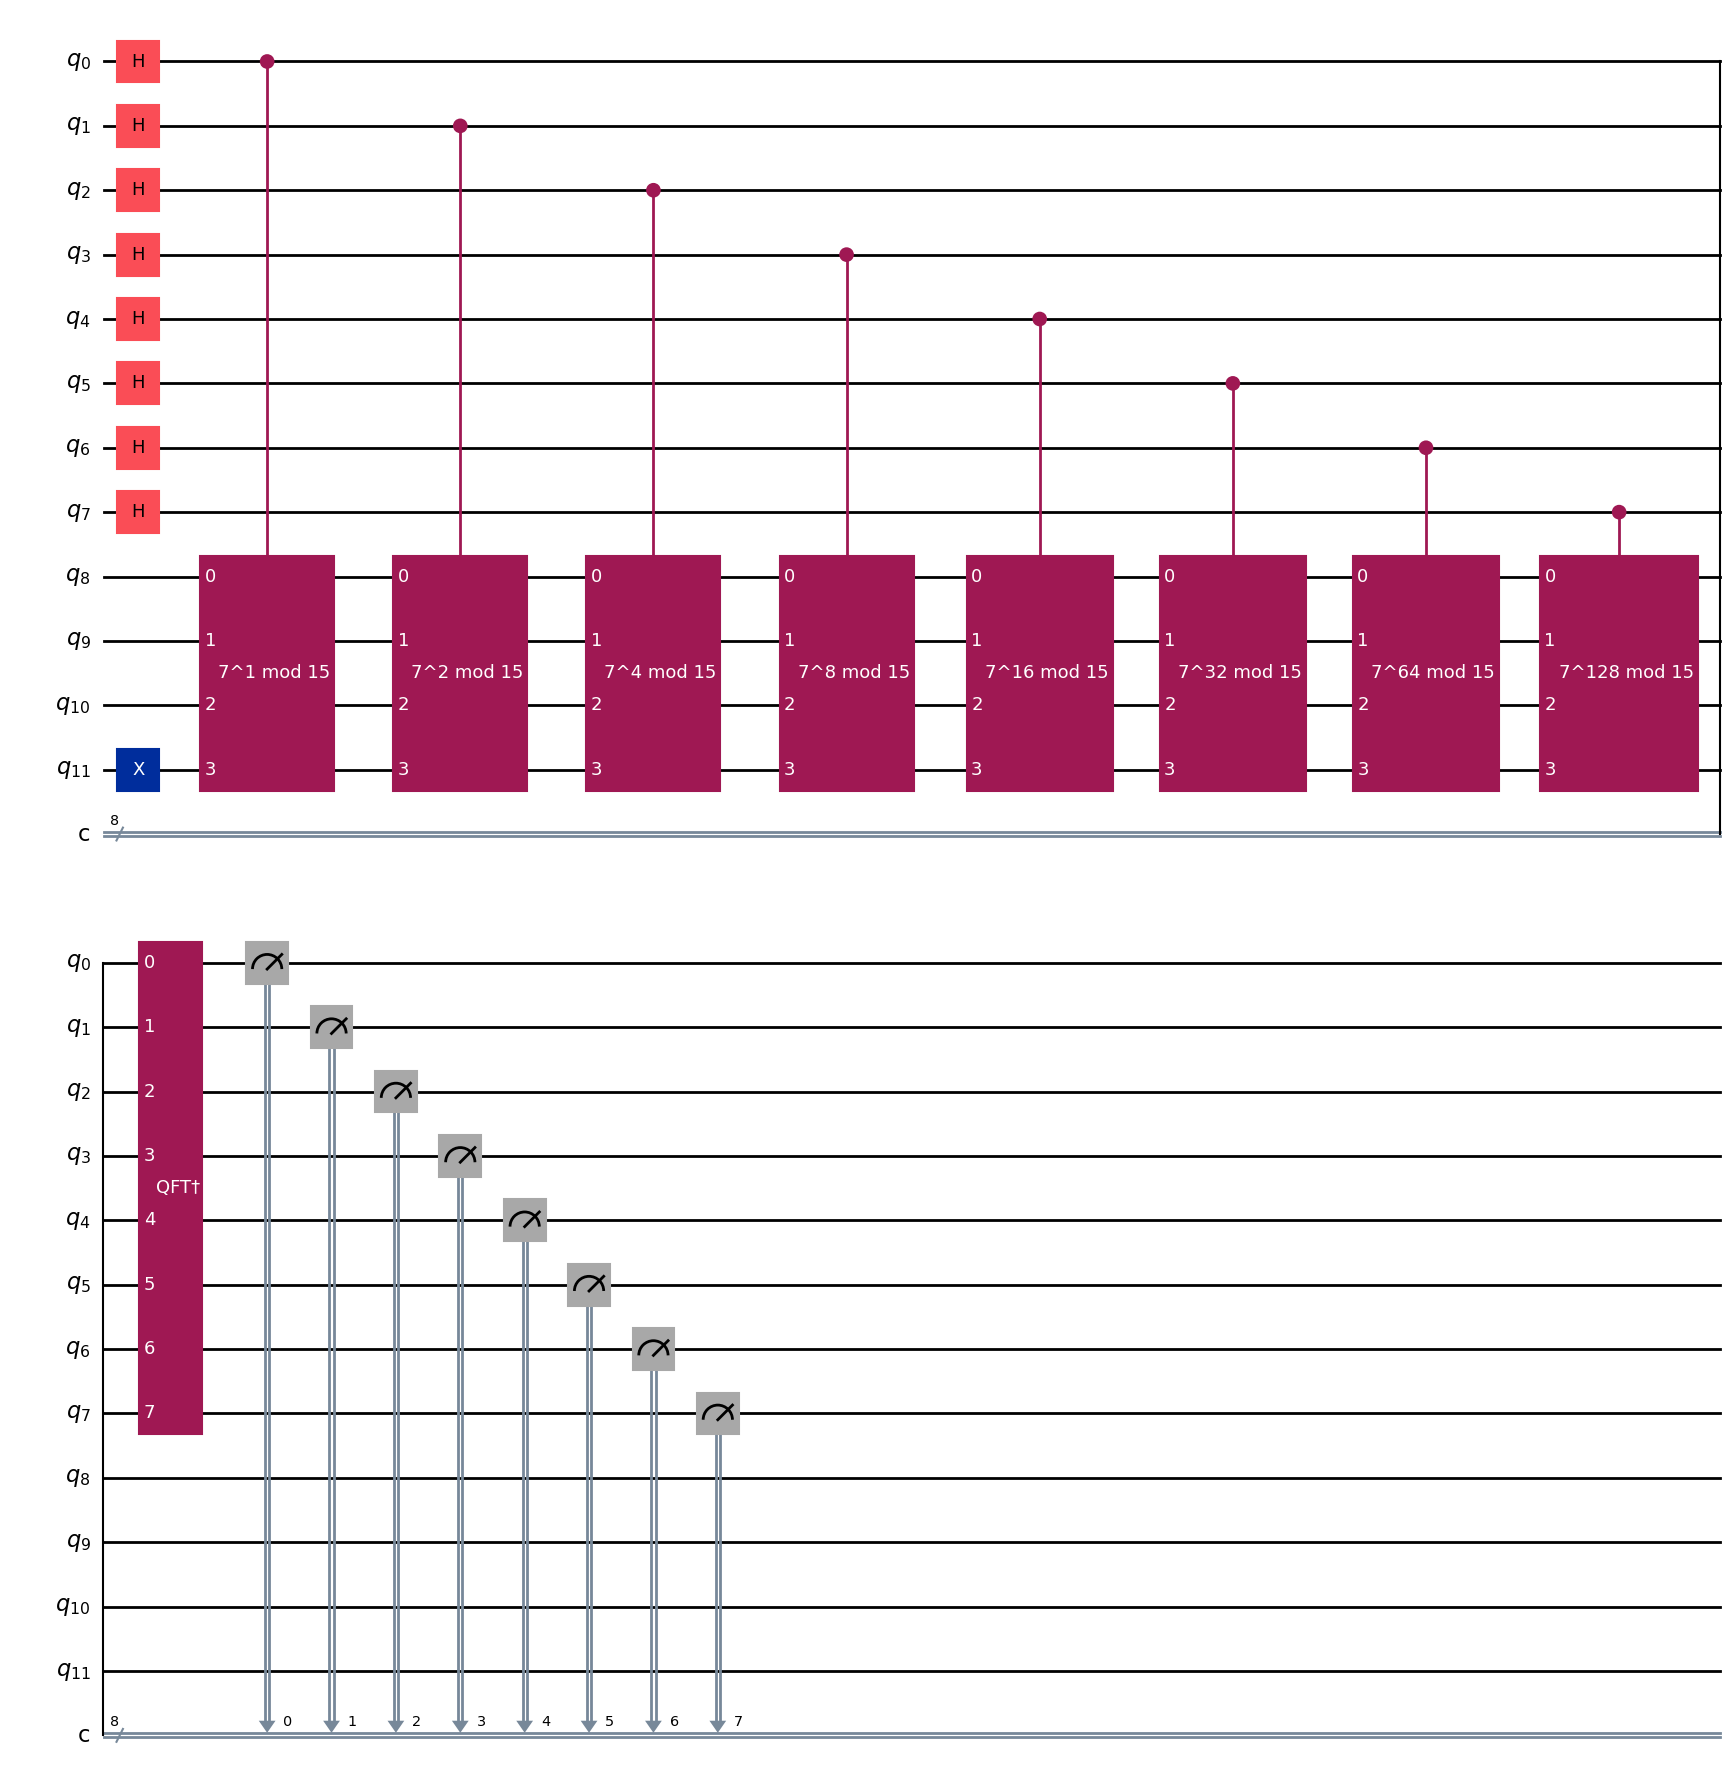

Register Reading: 10000000
Corresponding Phase: 0.500000


Fraction(1, 2)

In [40]:
phase = qpe_amod15(a) # Phase = s/r
Fraction(phase).limit_denominator(15) # Denominator should (hopefully!) tell us r

In [41]:
frac = Fraction(phase).limit_denominator(15)
s, r = frac.numerator, frac.denominator
print(r)

2


Now we have $r$, we might be able to use this to find a factor of $N$. Since:

$$a^r \bmod N = 1 $$

then:

$$(a^r - 1) \bmod N = 0 $$

which means $N$ must divide $a^r-1$. And if $r$ is also even, then we can write:

$$a^r -1 = (a^{r/2}-1)(a^{r/2}+1)$$

(if $r$ is not even, we cannot go further and must try again with a different value for $a$). There is then a high probability that the greatest common divisor of $N$ and either $a^{r/2}-1$, or $a^{r/2}+1$ is a proper factor of $N$ [2]:

In [36]:
guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
print(guesses)

[3, 1]


The cell below repeats the algorithm until at least one factor of 15 is found. You should try re-running the cell a few times to see how it behaves.

In [37]:
N = 15
a = 7
factor_found = False
attempt = 0
while not factor_found:
    attempt += 1
    print("\nAttempt %i:" % attempt)
    phase = qpe_amod15(a) # Phase = s/r
    frac = Fraction(phase).limit_denominator(N) # Denominator should (hopefully!) tell us r
    r = frac.denominator
    print("Result: r = %i" % r)
    if phase != 0:
        # Guesses for factors are gcd(x^{r/2} ±1 , 15)
        guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
        print("Guessed Factors: %i and %i" % (guesses[0], guesses[1]))
        for guess in guesses:
            if guess not in [1,N] and (N % guess) == 0: # Check to see if guess is a factor
                print("*** Non-trivial factor found: %i ***" % guess)
                factor_found = True


Attempt 1:
Register Reading: 00000000
Corresponding Phase: 0.000000
Result: r = 1

Attempt 2:
Register Reading: 10000000
Corresponding Phase: 0.500000
Result: r = 2
Guessed Factors: 3 and 1
*** Non-trivial factor found: 3 ***


### Run it now on an actual quantum computer

In [42]:
# Run your circuit on a real device
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel='ibm_quantum')
backend = service.least_busy()
print(backend.name)
sampler = Sampler(mode=backend)
sampler.options.default_shots = 100

ibm_sherbrooke


In [70]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)

a = 7

n_count = 8
qc = QuantumCircuit(4+n_count, n_count)
for q in range(n_count):
    qc.h(q)     # Initialize counting qubits in state |+>
qc.x(3+n_count) # And auxiliary register in state |1>
for q in range(n_count): # Do controlled-U operations
    qc.append(c_amod15(a, 2**q), 
             [q] + [i+n_count for i in range(4)])
qc.append(qft_dagger(n_count), range(n_count)) # Do inverse-QFT
qc.measure(range(n_count), range(n_count))
#display(qc.draw('mpl'))

t_qc = pm.run(qc)
shots = 100
job = sampler.run([t_qc], shots=shots)
# Setting memory=True below allows us to see a list of each sequential reading



In [73]:
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: cz4w0a939f40008sefg0
>>> Job Status: DONE


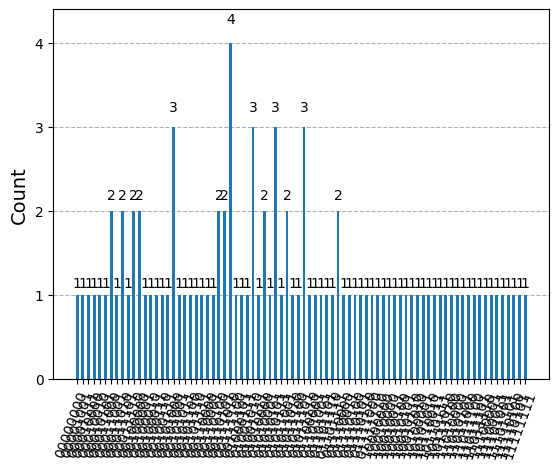

In [74]:
# get the results from the computation
result = job.result()
counts = result[0].data.c.get_counts()
plot_histogram(counts)

In [ ]:

readings = result.get_memory()
print("Register Reading: " + readings[0])
phase = int(readings[0],2)/(2**n_count)
print("Corresponding Phase: %f" % phase)
p

In [85]:
secret_key_from_prime?

Signature: secret_key_from_prime(prime1, prime2, e)
Docstring: <no docstring>
File:      /var/folders/jh/9wz4xz9j17x2c_b3x0zgtnv40000gn/T/ipykernel_4401/527998856.py
Type:      function

In [86]:
import pickle

with open("../encrypted_msg.pkl",'rb') as file:
    message = pickle.load(file)

public_key = (15, 3)

secret_key = secret_key_from_prime(3,5,3)

p, q = 3, 5

# Step 4: Decrypt the encrypted bitstring and check it matches the original
decrypted_bitstring = decrypt(message, secret_key, p, q)
print("Decrypted Bitstring:", decrypted_bitstring)


# Step 5: Reconstruct the text from the decrypted bitstring
reconstructed_text = reformat_decrypted_bitstring(decrypted_bitstring)
print("Reconstructed Text:", reconstructed_text)



IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Reconstructed Text: ÿThe Project Gutenberg eBook of The Art of War
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: The Art of War

Author: active 6th century B.C. Sunzi

Translator: Lionel Giles

Release date: May 1, 1994 [eBook #132]
                Most recently updated: October 29, 2024

Language: English

Original publication: , 1910


*** START OF THE PROJECT GUTENBERG EBOOK THE ART OF WAR ***
Sun Tzŭ
on
The Art of War

THE OLDEST MILITARY TREATISE IN THE WORLD
Translated from the Chinese with Introduction and Critical Notes

BY
LIONEL GILES, M.A.

Assistant in the Department of 

## 6. References

1. Stephane Beauregard, _Circuit for Shor's algorithm using 2n+3 qubits,_ [arXiv:quant-ph/0205095](https://arxiv.org/abs/quant-ph/0205095)

2. M. Nielsen and I. Chuang, _Quantum Computation and Quantum Information,_ Cambridge Series on Information and the Natural Sciences (Cambridge University Press, Cambridge, 2000). (Page 633)